In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/tmp/ipykernel_11510/1020607637.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [9]:
df=df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [10]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
def visual(x,y,xLabel):
    plt.figure(figsize = (10,5))
    plt.hist([x,y],color=['red','green'],label=['Exit','Not Exit'])
    plt.xlabel(xLabel,fontsize = 20)
    plt.ylabel("No. of customer", fontsize = 20)
    plt.legend()

In [12]:
df_churn_exited = df[df['Exited']==1]['Tenure']
df_churn_not_exited = df[df['Exited']==0]['Tenure']

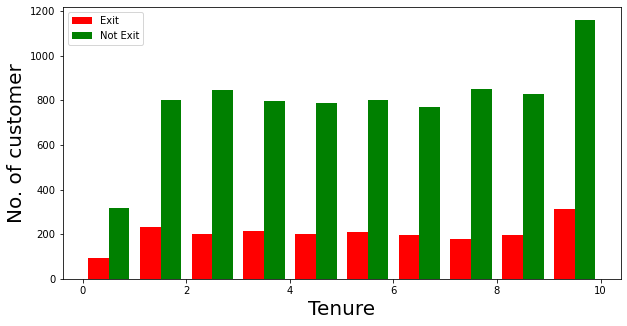

In [13]:
visual(df_churn_exited, df_churn_not_exited, "Tenure")

In [14]:
df_churn_exited2 = df[df['Exited']==1]['Age']
df_churn_not_exited2 = df[df['Exited']==0]['Age']

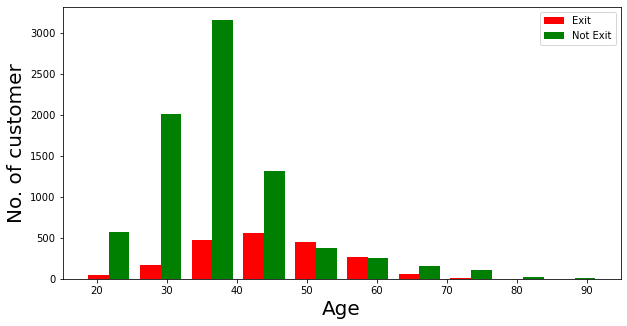

In [15]:
visual(df_churn_exited2, df_churn_not_exited2, "Age")

In [16]:
X = df[['CreditScore','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]
states = pd.get_dummies(df['Geography'],drop_first = True)
gender = pd.get_dummies(df['Gender'],drop_first = True)

In [17]:
df = pd.concat([df,gender,states], axis = 1)

In [18]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,Germany,Spain
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,False,False,True
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,False,False,True


In [19]:
X = df[['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Male'
,'Germany','Spain']]
y = df['Exited']

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30)

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [22]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
X_train

array([[ 0.2498302 ,  0.97392052,  1.02895346, ...,  0.92004266,
        -0.57844998, -0.57669044],
       [ 1.13480932, -1.24006652, -1.39420796, ..., -1.08690612,
        -0.57844998, -0.57669044],
       [ 0.51738203, -0.18120315,  1.02895346, ...,  0.92004266,
        -0.57844998, -0.57669044],
       ...,
       [ 0.28070156, -1.04754591, -0.00954429, ...,  0.92004266,
        -0.57844998,  1.73403256],
       [-0.20294982, -0.75876499, -1.04804204, ..., -1.08690612,
        -0.57844998,  1.73403256],
       [ 0.54825339,  1.45522205,  0.33662163, ..., -1.08690612,
         1.72875793, -0.57669044]])

In [24]:
X_test

array([[-1.66419443, -0.08494284,  1.02895346, ...,  0.92004266,
        -0.57844998, -0.57669044],
       [ 1.00103341,  0.10757777, -0.70187612, ..., -1.08690612,
         1.72875793, -0.57669044],
       [-1.29373805, -0.56624437, -1.39420796, ...,  0.92004266,
        -0.57844998, -0.57669044],
       ...,
       [-0.12062618, -0.37372376,  1.7212853 , ...,  0.92004266,
         1.72875793, -0.57669044],
       [ 1.3920707 ,  2.2253045 ,  1.02895346, ..., -1.08690612,
        -0.57844998, -0.57669044],
       [ 2.05065982, -1.14380621, -1.39420796, ...,  0.92004266,
         1.72875793, -0.57669044]])

In [26]:
import keras

In [27]:
from keras.models import Sequential #To create sequential neural network
from keras.layers import Dense #To create hidden layers

In [28]:
classifier = Sequential()

In [30]:
classifier.add(Dense(activation = "relu",input_dim = 11,units = 6,kernel_initializer = "uniform"))

In [31]:
classifier.add(Dense(activation = "relu",units = 6,kernel_initializer = "uniform"))

In [32]:
classifier.add(Dense(activation = "sigmoid",units = 1,kernel_initializer = "uniform"))

In [33]:
classifier.compile(optimizer="adam",loss = 'binary_crossentropy',metrics = ['accuracy'])

In [34]:
classifier.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 6)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             7 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 182 (728.00 B)

 Trainable params: 182 (728.00 B)

 Non-trainable params: 0 (0.00 B)

In [36]:
classifier.fit(X_train,y_train,batch_size=10,epochs=100)

Epoch 1/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step - accuracy: 0.8368 - loss: 0.3972
Epoch 2/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step - accuracy: 0.8384 - loss: 0.3871
Epoch 3/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step - accuracy: 0.8383 - loss: 0.3951
Epoch 4/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step - accuracy: 0.8398 - loss: 0.3865
Epoch 5/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step - accuracy: 0.8371 - loss: 0.3940
Epoch 6/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step - accuracy: 0.8389 - loss: 0.3862
Epoch 7/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step - accuracy: 0.8358 - loss: 0.4005
Epoch 8/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - accuracy: 0.8457 - loss: 0.3808
Epoch 9/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step - accuracy: 0.8460 - loss: 0.3824
Epoch 10/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step - accuracy: 0.8370 - loss: 0.3967
Epoch 11/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step - accuracy: 0.8378 - loss: 0.3918
Epoch 12/100
700/70

700/700 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - accuracy: 0.8439 - loss: 0.3833
Epoch 68/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step - accuracy: 0.8406 - loss: 0.3889
Epoch 69/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - accuracy: 0.8479 - loss: 0.3719
Epoch 70/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step - accuracy: 0.8544 - loss: 0.3700
Epoch 71/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - accuracy: 0.8514 - loss: 0.3749
Epoch 72/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step - accuracy: 0.8473 - loss: 0.3807
Epoch 73/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step - accuracy: 0.8486 - loss: 0.3845
Epoch 74/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - accuracy: 0.8434 - loss: 0.3829
Epoch 75/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step - accuracy: 0.8414 - loss: 0.3925
Epoch 76/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - accuracy: 0.8421 - loss: 0.3879
Epoch 77/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step - accuracy: 0.8419 - loss: 0.3904
Epoch 78/100
700/700 ━━

In [37]:
y_pred =classifier.predict(X_test)
y_pred = (y_pred > 0.5)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step


In [38]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [45]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[2266,  121],
       [ 389,  224]])

In [46]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.83

Text(69.0, 0.5, 'Truth')

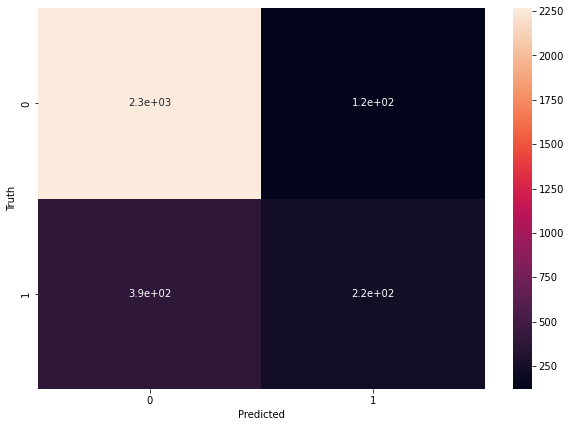

In [47]:
plt.figure(figsize = (10,7))
sns.heatmap(cm,annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      2387
           1       0.65      0.37      0.47       613

    accuracy                           0.83      3000
   macro avg       0.75      0.66      0.68      3000
weighted avg       0.81      0.83      0.81      3000

